In [1]:
import pandas as pd
import os
import glob
import cv2

path = os.getcwd()
dataset_path = path + '\\data01-26-test2'
print(dataset_path)

C:\Users\82108\Documents\rcCarEndtoEnd\data01-26-test2


image size is (640, 480)


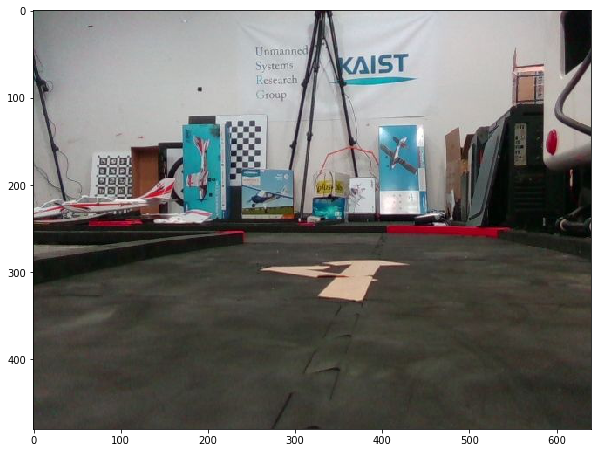

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# Show a sample image
index = 0
for image_path in glob.glob(dataset_path + "\\" + "*.jpeg"):
    index+=1
    sample_path = image_path
    if index == 1: break

img = Image.open(sample_path)
print("image size is %s" % (img.size,))

fig = plt.figure(figsize = (10,10))
plt.imshow(img)
    

In [4]:
df = pd.read_csv("./dataset.csv")

In [5]:
df.head()

,Unnamed: 0,time,image_name,steer
0,0,1.611640e+18,frame_1611643764711043119.jpeg,1540
1,1,1.611640e+18,frame_1611643764744611740.jpeg,1540
2,2,1.611640e+18,frame_1611643764778180361.jpeg,1536
3,3,1.611640e+18,frame_1611643764811748505.jpeg,1540
4,4,1.611640e+18,frame_1611643764845316648.jpeg,1536


In [6]:
# Normalize steer data
df['steer'] -= 1100
df['steer'] /= 800

In [7]:
df['steer'].mean(), df['steer'].std()

(0.34280311973021144, 0.24928013151611308)

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df, test_size = 0.2)
df_train.to_csv("./train_dataset.csv")
df_valid.to_csv("./val_dataset.csv")